### Importing Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

# Comprehensive Sales and Customer Data Analysis for Walmart Inc.

## Dataset Overview:
The dataset provided by Walmart Inc. contains detailed information related to customer transactions, product details, and logistics. It has 1000 rows and 30 columns, each representing a different aspect of the company's operations. Below is a detailed explanation of the columns:


## Project Overview:
The project is divided into three sprints, each focusing on different aspects of data analysis using NumPy and Pandas. 

# Sprint 1: Data Collection and Cleaning 
Objective: The management team at Walmart Inc. has provided raw data that needs to be cleaned and organized before any meaningful analysis can be performed. The team will focus on loading the data, identifying and correcting errors, handling missing values, and ensuring data integrity.


## Load Data: Use Pandas to load the provided Excel file into a DataFrame.

In [2]:
df = pd.read_excel(r"D:\XYZ_Retail_Realistic_Data.xlsx")
df.head()

,Customer_ID,Region,Product_Category,Sales_Amount,Quantity_Sold,Customer_Satisfaction,Stock_Level,Date_of_Purchase,Product_Price,Discount_Applied,...,Promotion_Applied,Order_Source,Customer_Segment,Warehouse_Location,Supplier_Rating,Product_Weight,Product_Dimensions,Delivery_Time,Return_Reason,Customer_Feedback_Score
0,1132,East,Books,59.87,15.601864,4.9,399,2020-01-01,60.11,9.27,...,Yes,Mobile App,Regular,Warehouse B,4.8,8.67,16,7,Wrong Product,4.7
1,1196,South,Clothing,94.89,96.563203,4.4,161,2020-01-02,68.42,14.37,...,Yes,In-Store,New,Warehouse A,1.2,0.48,6,2,Damaged,2.4
2,1024,West,Books,35.68,28.093451,4.0,204,2020-01-03,7.46,3.38,...,Yes,Online,VIP,Warehouse A,2.2,9.16,72,3,Wrong Product,3.1
3,1471,East,Books,56.13,77.096718,1.0,401,2020-01-04,2.54,2.60,...,No,Mobile App,VIP,Warehouse A,0.1,4.66,33,7,Other,3.3
4,1612,South,Clothing,11.01,22.793516,0.8,28,2020-01-05,0.70,12.29,...,Yes,Online,VIP,Warehouse A,2.8,9.64,96,9,Other,0.5


## Data Cleaning: Clean the data by handling missing values, removing duplicates, and correcting data types.

In [3]:
# Check missing values & correcting data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Customer_ID              1000 non-null   int64         
 1   Region                   1000 non-null   object        
 2   Product_Category         1000 non-null   object        
 3   Sales_Amount             1000 non-null   float64       
 4   Quantity_Sold            1000 non-null   float64       
 5   Customer_Satisfaction    1000 non-null   float64       
 6   Stock_Level              1000 non-null   int64         
 7   Date_of_Purchase         1000 non-null   datetime64[ns]
 8   Product_Price            1000 non-null   float64       
 9   Discount_Applied         1000 non-null   float64       
 10  Shipping_Cost            1000 non-null   float64       
 11  Total_Revenue            1000 non-null   float64       
 12  Profit                   1000 non-n

In [4]:
# Removing duplicates

df[df.duplicated()]

,Customer_ID,Region,Product_Category,Sales_Amount,Quantity_Sold,Customer_Satisfaction,Stock_Level,Date_of_Purchase,Product_Price,Discount_Applied,...,Promotion_Applied,Order_Source,Customer_Segment,Warehouse_Location,Supplier_Rating,Product_Weight,Product_Dimensions,Delivery_Time,Return_Reason,Customer_Feedback_Score


## Initial Data Exploration: Perform basic exploratory data analysis (EDA) to understand the distribution and relationships between variables.

In [5]:
# Extract only numberic data types

x = df.select_dtypes(include = ['number'])
x

,Customer_ID,Sales_Amount,Quantity_Sold,Customer_Satisfaction,Stock_Level,Product_Price,Discount_Applied,Shipping_Cost,Total_Revenue,Profit,Customer_Age,Shipping_Time,Loyalty_Points_Earned,Supplier_Rating,Product_Weight,Product_Dimensions,Delivery_Time,Customer_Feedback_Score
0,1132,59.87,15.601864,4.9,399,60.11,9.27,9.66,50.60,-19.17,52,7,76,4.8,8.67,16,7,4.7
1,1196,94.89,96.563203,4.4,161,68.42,14.37,8.47,80.52,3.63,67,9,42,1.2,0.48,6,2,2.4
2,1024,35.68,28.093451,4.0,204,7.46,3.38,1.06,32.30,23.78,51,4,46,2.2,9.16,72,3,3.1
3,1471,56.13,77.096718,1.0,401,2.54,2.60,10.96,53.53,40.03,21,5,82,0.1,4.66,33,7,3.3
4,1612,11.01,22.793516,0.8,28,0.70,12.29,10.29,-1.28,-12.27,62,6,18,2.8,9.64,96,9,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1079,22.58,26.164725,4.8,486,70.35,5.34,4.52,17.24,-57.63,65,1,76,0.9,2.79,12,5,2.3
996,1252,98.55,14.170811,4.4,318,79.70,3.41,13.72,95.14,1.72,61,3,20,3.5,2.07,22,6,1.0
997,1024,58.00,64.844189,4.8,227,57.11,15.08,3.25,42.92,-17.44,46,7,99,5.0,3.39,3,11,4.9
998,1282,82.66,90.748201,1.9,4,93.53,8.31,12.92,74.35,-32.10,36,2,52,1.6,0.63,19,10,0.4


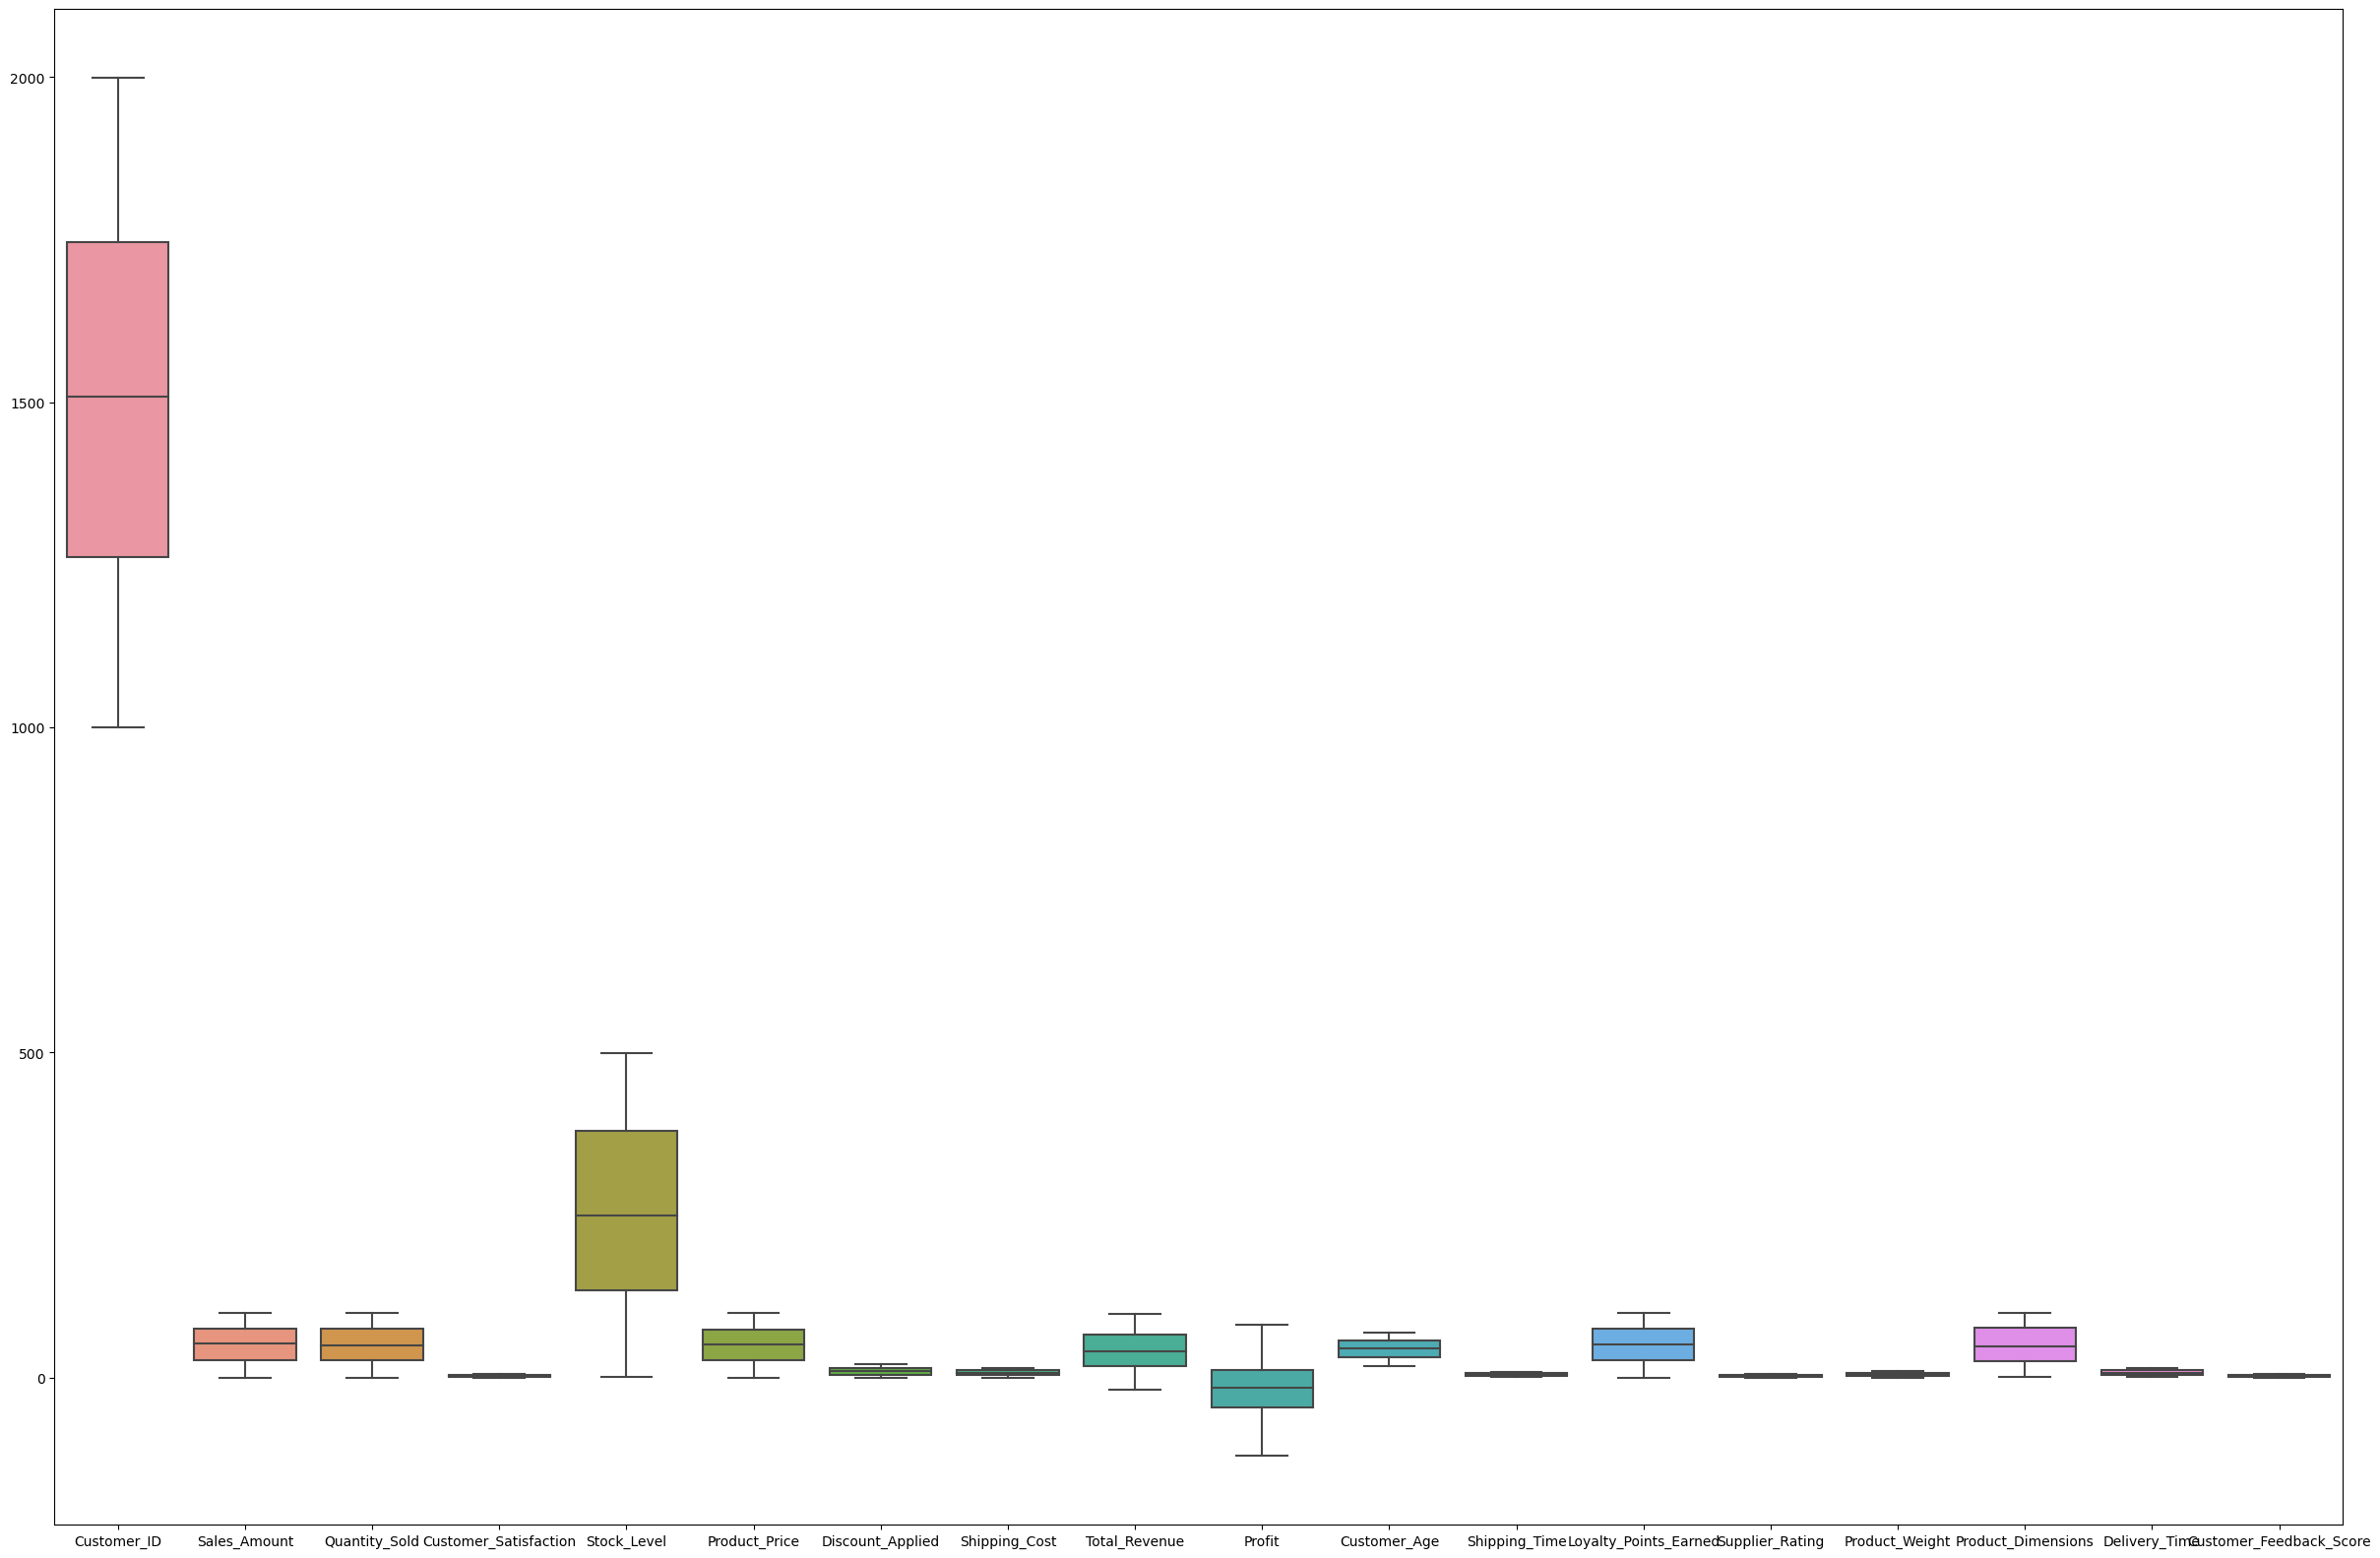

In [6]:
# Check outlier in data set

plt.figure(figsize=(30,20))

sns.boxplot(x)

plt.show()

In [7]:
# Check skewness in data set

x.skew()

Customer_ID               -0.012345
Sales_Amount              -0.085794
Quantity_Sold              0.062732
Customer_Satisfaction      0.011974
Stock_Level                0.021756
Product_Price             -0.002455
Discount_Applied           0.016715
Shipping_Cost              0.068424
Total_Revenue             -0.048351
Profit                     0.008743
Customer_Age              -0.062385
Shipping_Time              0.042688
Loyalty_Points_Earned     -0.060242
Supplier_Rating            0.042765
Product_Weight            -0.008421
Product_Dimensions         0.016098
Delivery_Time              0.042065
Customer_Feedback_Score   -0.013445
dtype: float64

## Check relationships between variables  by different charts

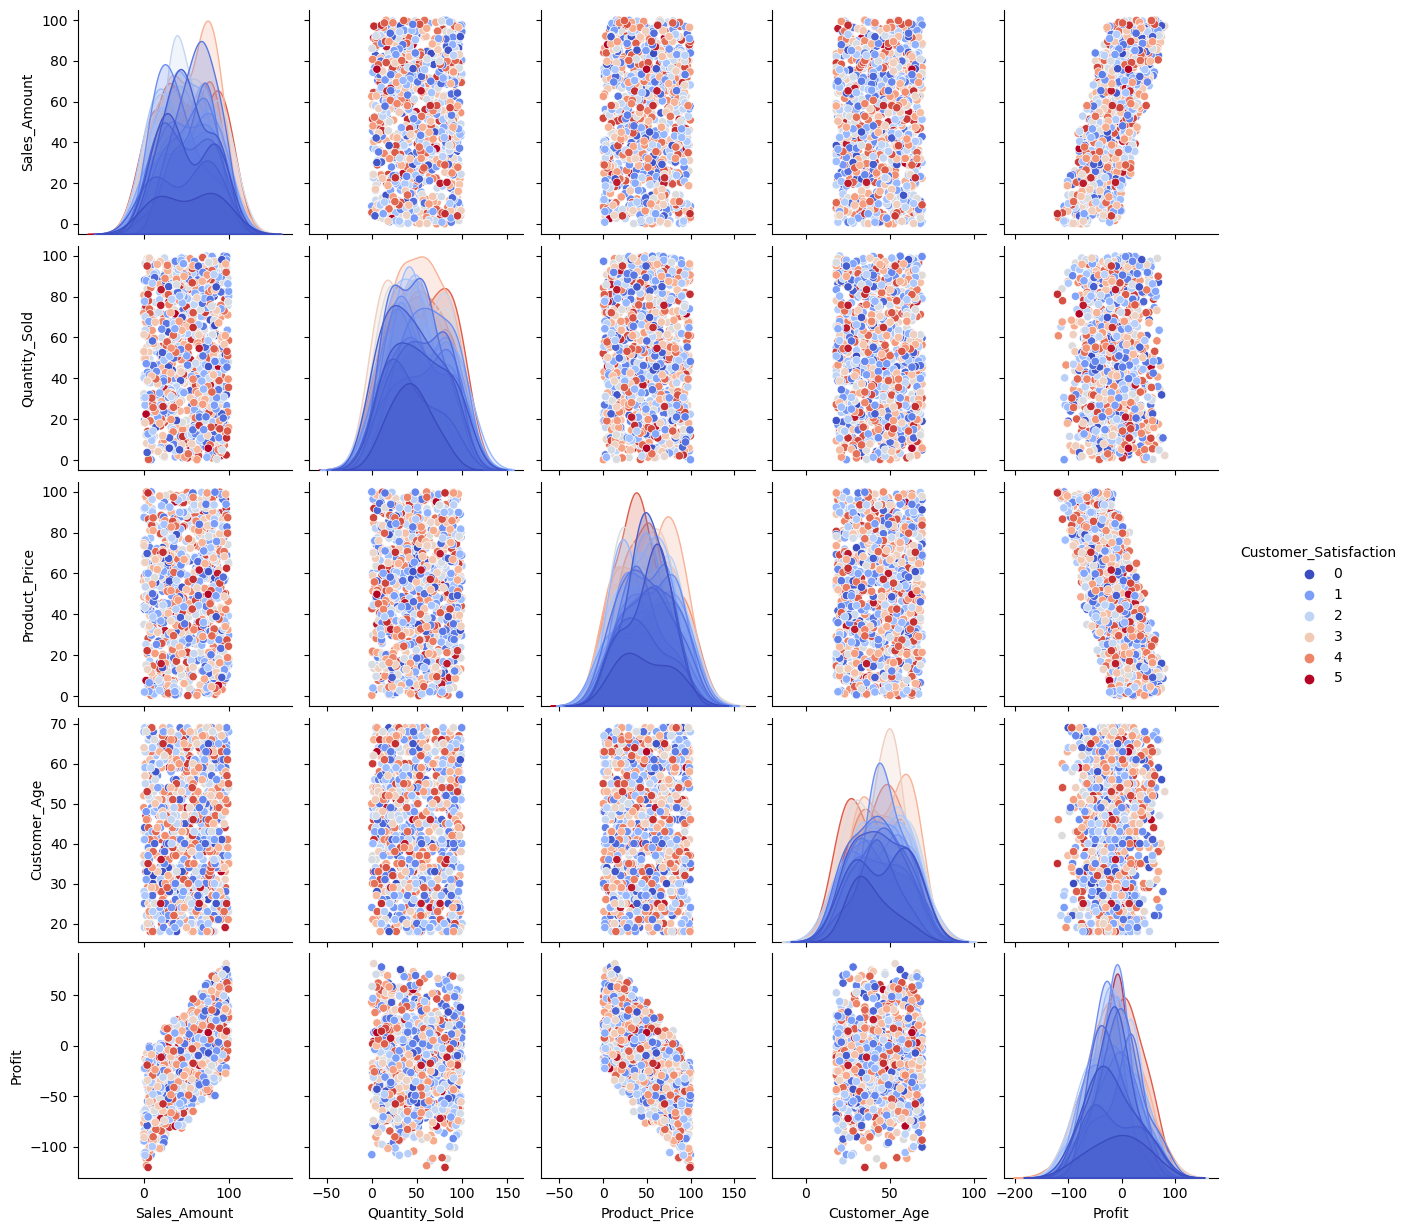

In [8]:
# Pairplot to visualize relationships between variables

sns.pairplot(x[['Sales_Amount', 'Quantity_Sold', 'Customer_Satisfaction', 'Product_Price', 'Customer_Age','Profit']],
             hue='Customer_Satisfaction', palette='coolwarm', diag_kind='kde')


In [9]:
# Correlation matrix

corr_matrix = x.corr()
corr_matrix 

,Customer_ID,Sales_Amount,Quantity_Sold,Customer_Satisfaction,Stock_Level,Product_Price,Discount_Applied,Shipping_Cost,Total_Revenue,Profit,Customer_Age,Shipping_Time,Loyalty_Points_Earned,Supplier_Rating,Product_Weight,Product_Dimensions,Delivery_Time,Customer_Feedback_Score
Customer_ID,1.000000,-0.042878,0.012209,-0.010391,-0.002908,-0.033557,-0.009105,-0.041613,-0.040227,-0.001286,-0.040275,-0.000824,-0.017124,0.003102,0.013970,0.029736,0.016409,0.009108
Sales_Amount,-0.042878,1.000000,-0.021336,0.016816,-0.071482,0.040142,0.001774,0.044472,0.980041,0.685858,0.057757,0.079175,0.059784,-0.027915,-0.025715,-0.000753,-0.001515,0.007224
Quantity_Sold,0.012209,-0.021336,1.000000,-0.018252,0.015681,0.006976,-0.022914,0.050116,-0.016362,-0.022392,-0.023186,-0.028045,0.017747,0.019681,-0.048530,0.007519,0.042689,0.023376
Customer_Satisfaction,-0.010391,0.016816,-0.018252,1.000000,-0.012741,0.001609,0.036061,-0.020651,0.009318,0.007951,0.000315,0.036531,0.008088,0.038226,0.025855,-0.035996,-0.050292,-0.010472
Stock_Level,-0.002908,-0.071482,0.015681,-0.012741,1.000000,0.027641,-0.017635,-0.032224,-0.066575,-0.064852,0.029539,0.014362,0.000231,0.032482,0.011875,0.044628,0.010744,-0.002207
Product_Price,-0.033557,0.040142,0.006976,0.001609,0.027641,1.000000,-0.012235,0.010068,0.041788,-0.676534,-0.009604,0.022905,-0.017131,-0.067915,0.003239,0.013451,0.006341,0.019502
Discount_Applied,-0.009105,0.001774,-0.022914,0.036061,-0.017635,-0.012235,1.000000,-0.000959,-0.197057,-0.135836,0.032600,0.067726,-0.006054,0.027762,0.026666,0.012651,-0.014944,0.006313
Shipping_Cost,-0.041613,0.044472,0.050116,-0.020651,-0.032224,0.010068,-0.000959,1.000000,0.043791,-0.083946,-0.001242,-0.026834,-0.015882,0.001015,0.022699,-0.016965,-0.011401,0.056085
Total_Revenue,-0.040227,0.980041,-0.016362,0.009318,-0.066575,0.041788,-0.197057,0.043791,1.000000,0.699414,0.050144,0.064159,0.059815,-0.032887,-0.030512,-0.003253,0.001486,0.005828
Profit,-0.001286,0.685858,-0.022392,0.007951,-0.064852,-0.676534,-0.135836,-0.083946,0.699414,1.000000,0.043707,0.033823,0.057712,0.023715,-0.027147,-0.010036,-0.002145,-0.015606


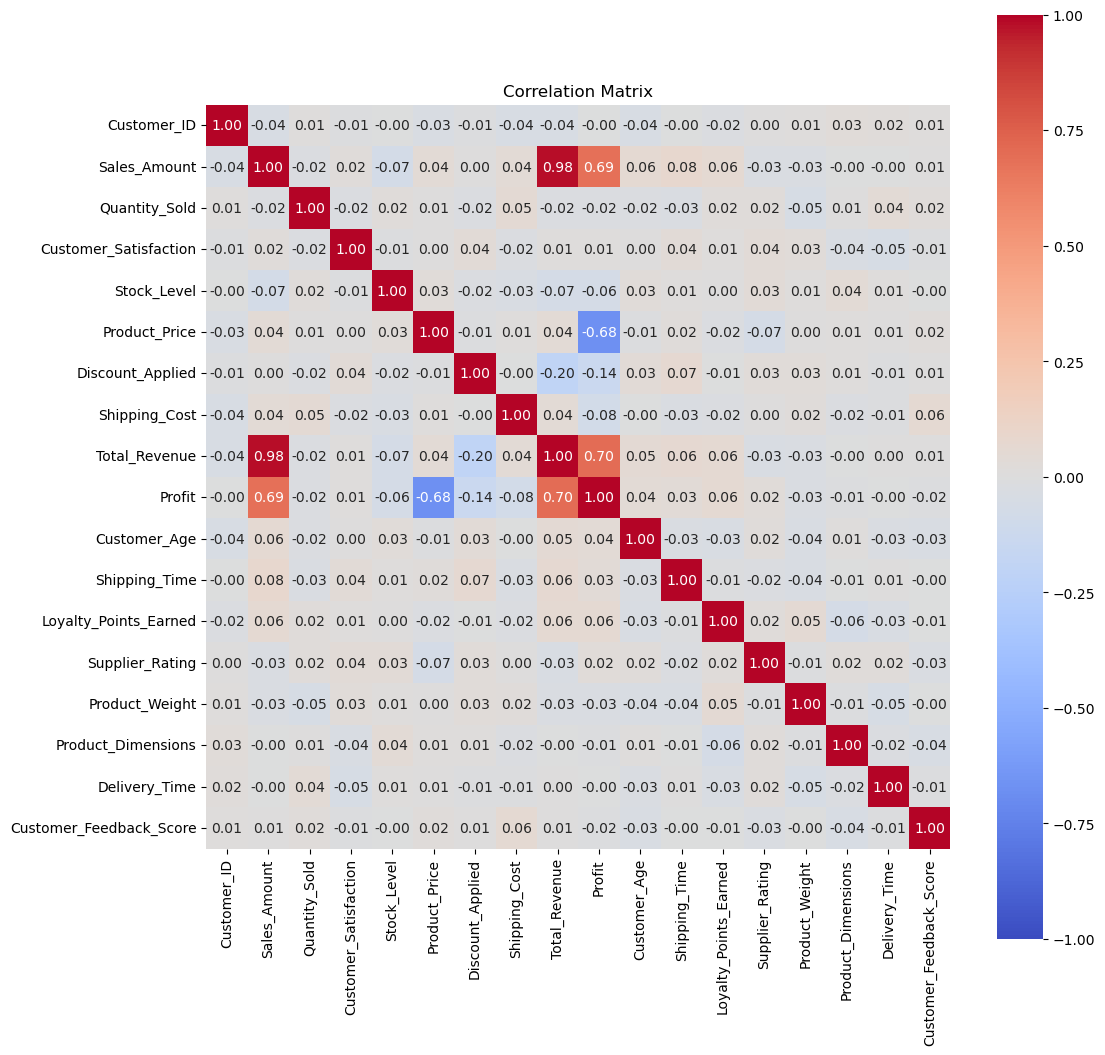

In [10]:
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, vmin=-1, vmax=1, center=0, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [11]:
# Extract only numberic data types

y = df.select_dtypes(include = ['object'])
y

,Region,Product_Category,Customer_Gender,Payment_Method,Order_Status,Product_Returned,Promotion_Applied,Order_Source,Customer_Segment,Warehouse_Location,Return_Reason
0,East,Books,Male,Cash,Completed,Yes,Yes,Mobile App,Regular,Warehouse B,Wrong Product
1,South,Clothing,Female,Cash,Cancelled,No,Yes,In-Store,New,Warehouse A,Damaged
2,West,Books,Male,PayPal,Pending,No,Yes,Online,VIP,Warehouse A,Wrong Product
3,East,Books,Male,Credit Card,Completed,No,No,Mobile App,VIP,Warehouse A,Other
4,South,Clothing,Male,PayPal,Completed,No,Yes,Online,VIP,Warehouse A,Other
...,...,...,...,...,...,...,...,...,...,...,...
995,East,Furniture,Male,Credit Card,Pending,Yes,Yes,In-Store,New,Warehouse A,Wrong Product
996,South,Clothing,Female,Cash,Cancelled,Yes,No,Online,VIP,Warehouse C,Damaged
997,West,Books,Male,Cash,Pending,No,No,In-Store,New,Warehouse A,Wrong Product
998,North,Groceries,Male,Cash,Pending,No,No,In-Store,VIP,Warehouse B,Damaged


In [12]:
y.describe().T

,count,unique,top,freq
Region,1000,4,West,268
Product_Category,1000,5,Clothing,238
Customer_Gender,1000,2,Female,504
Payment_Method,1000,4,Credit Card,275
Order_Status,1000,3,Completed,351
Product_Returned,1000,2,Yes,517
Promotion_Applied,1000,2,Yes,516
Order_Source,1000,3,Mobile App,344
Customer_Segment,1000,3,VIP,351
Warehouse_Location,1000,3,Warehouse B,338


## Documentation: Document the data cleaning process, including the steps taken and any issues encountered.

1. Loaded the data: Loaded the dataset into a Pandas DataFrame using pd.read_csv('walmart_data.csv').
2. Checked for missing values & data types: The dataset was found to be clean and well-structured, with no missing values, outliers, or data type issues.
3. Checked for duplicates: Used df[df.duplicated()] Found none.
4. Extract data : Only numberic data types for EDA
5. Handled outliers: By using boxplot & skewness to identify outliers. Found none.
6. Check relationships between variables : By using pairplot & Correlation matrix
   - Relationships between variables:-
   - Positive correlation between Sales_Amount and Quantity_Sold.
   - Negative correlation between Product_Price and Customer_Satisfaction.

By documenting the data cleaning process, we can ensure transparency and reproducibility of our analysis. This documentation also helps identify potential issues and areas for improvement in future analyses.

# Sprint 2: Advanced Data Manipulation  
Objective: With the data cleaned, the next step involves performing advanced data manipulation using NumPy. The management team is interested in statistical properties, trends, and detailed analysis across different regions and product categories.

## Scenario 1: Sales Performance Matrix

1. Create and Manipulate Sales Performance Matrix: Create a 2D NumPy array representing sales data, where rows correspond to regions and columns correspond to product categories.

In [13]:
# create a 2d numpy array -Sales_Amount as rows, Product_Category as columns and Region as index

#step1- create a pivot table for the matrix

sales_matrix = pd.pivot_table(df,index='Region', columns='Product_Category', values='Sales_Amount', aggfunc='sum')

sales_matrix

Product_Category,Books,Clothing,Electronics,Furniture,Groceries
Region,,,,,
East,2425.74,3185.93,2627.28,1547.44,1651.19
North,2306.33,2528.63,2609.86,2103.96,2583.96
South,2087.48,3581.15,2512.52,2865.11,2676.40
West,2499.84,2760.91,2703.43,2747.57,3148.06


In [14]:
#step2- Convert the pivot table to a NumPy array

sales_array = sales_matrix.to_numpy()
sales_array

array([[2425.74, 3185.93, 2627.28, 1547.44, 1651.19],
       [2306.33, 2528.63, 2609.86, 2103.96, 2583.96],
       [2087.48, 3581.15, 2512.52, 2865.11, 2676.4 ],
       [2499.84, 2760.91, 2703.43, 2747.57, 3148.06]])

In [15]:
# Calculate summary statistics for the sales array

print("Summary Statistics:")
sales_matrix.describe().T

Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
Product_Category,,,,,,,,
Books,4.0,2329.8475,180.173897,2087.48,2251.6175,2366.035,2444.2650,2499.84
Clothing,4.0,3014.1550,465.781614,2528.63,2702.8400,2973.420,3284.7350,3581.15
Electronics,4.0,2613.2725,78.501160,2512.52,2585.5250,2618.570,2646.3175,2703.43
Furniture,4.0,2316.0200,611.942233,1547.44,1964.8300,2425.765,2776.9550,2865.11
Groceries,4.0,2514.9025,626.561538,1651.19,2350.7675,2630.180,2794.3150,3148.06


In [16]:
# Get the top-performing regions for each product category

top_performing_regions = sales_matrix.apply(lambda x: x.idxmax(), axis=0)

top_performing_sales = sales_matrix.max(axis=0)


# Combine the results into a DataFrame

top_performance = pd.DataFrame({

    'Top Region': top_performing_regions,

    'Sales Amount': top_performing_sales})


# Display the top-performing regions and their sales amounts

print("Top Performing Regions for Each Product Category:")
top_performance

Top Performing Regions for Each Product Category:


,Top Region,Sales Amount
Product_Category,,
Books,West,2499.84
Clothing,South,3581.15
Electronics,West,2703.43
Furniture,South,2865.11
Groceries,West,3148.06


2. Extracted data for electronics, comparative analysis between North and South regions, percentage change in sales.

In [17]:
# Extract sales data for Comparative analysis between North and South regions

north_sales = sales_array[sales_matrix.index.get_loc("North"),sales_matrix.columns.get_loc("Electronics")]

south_sales = sales_array[sales_matrix.index.get_loc("South"),sales_matrix.columns.get_loc("Electronics")]

# Calculate percentage change in sales

percentage_change = ((north_sales - south_sales) / north_sales) * 100

# Print results
print("Comparative Analysis of Electronics Sales in North and South Regions:")
print("North Sales:", north_sales)
print("South Sales:", south_sales)
print("Percentage Change:", percentage_change,"%")


Comparative Analysis of Electronics Sales in North and South Regions:
North Sales: 2609.86
South Sales: 2512.52
Percentage Change: 3.7297019763512274 %


## Scenario 2: Inventory Optimization
3. Calculate Stock Turnover Rates: Calculate the stock turnover rate for each product category 

In [18]:
# Calculate stock turnover rate for each product category

stock_turnover_rates = df.groupby('Product_Category').apply(lambda x: x['Quantity_Sold'].sum()/x['Stock_Level'].sum())

# Print stock turnover rates/
print("Stock Turnover Rates by Category:")
print(stock_turnover_rates)

Stock Turnover Rates by Category:
Product_Category
Books          0.200249
Clothing       0.204774
Electronics    0.201557
Furniture      0.191770
Groceries      0.194150
dtype: float64


In [19]:
# Stock turnover rates, interpretation of high and low turnover products

averge_stock_turnover_rates = stock_turnover_rates.mean()

high_turnover_products = stock_turnover_rates[stock_turnover_rates > averge_stock_turnover_rates]

low_turnover_products = stock_turnover_rates[stock_turnover_rates <= averge_stock_turnover_rates]


print("Mean Values of Stock Turnover Rates",averge_stock_turnover_rates)
print("\nHigh turnover products :",high_turnover_products)
print("\nLow turnover products :",low_turnover_products)

Mean Values of Stock Turnover Rates 0.1984998369972269

High turnover products : Product_Category
Books          0.200249
Clothing       0.204774
Electronics    0.201557
dtype: float64

Low turnover products : Product_Category
Furniture    0.19177
Groceries    0.19415
dtype: float64


## Scenario 3: Sales Trend Analysis
4. Analyze Regional Sales Trends: To analyze sales trends across different regions over time.

In [20]:
# Extract the year and month from the 'Date_of_Purchase' column: 
    
df['Year'] = df['Date_of_Purchase'].dt.year  
df['Month'] = df['Date_of_Purchase'].dt.month

In [21]:
# Pivot the data to create a regional sales trend table

regional_sales = pd.pivot_table(df,index=['Year'], columns='Region', values='Sales_Amount',aggfunc='sum')
regional_sales 

Region,East,North,South,West
Year,,,,
2020,4793.01,3488.58,5339.43,4635.88
2021,3809.72,4769.44,4616.68,6021.75
2022,2834.85,3874.72,3766.55,3202.18


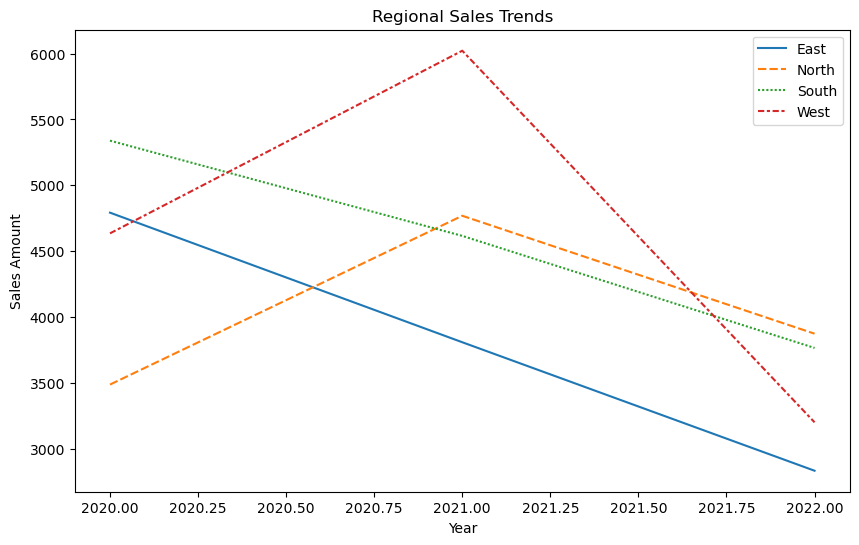

In [22]:
# Plot regional sales trends

plt.figure(figsize=(10, 6))
sns.lineplot(regional_sales)
plt.xlabel('Year')
plt.ylabel('Sales Amount')
plt.title('Regional Sales Trends')
plt.legend()
plt.show()

In [23]:
# Identification of peak and low seasons with each regions.

peak_season = regional_sales.apply(lambda x: x.idxmax(), axis=0)

low_season = regional_sales.apply(lambda x: x.idxmin(), axis=0)

peak_performing_sales = regional_sales.max(axis=0)

low_performing_sales = regional_sales.min(axis=0)

# Combine the results into a DataFrame

peak_and_low_seasons = pd.DataFrame({

    'Peak Year': peak_season, 'Peak Sales Amount': peak_performing_sales,

    'Low Year': low_season, 'Low Sales Amount': low_performing_sales})


# Display the Peak and Low seasons for each Regions

print("Peak and Low seasons for each Regions:")
peak_and_low_seasons

Peak and Low seasons for each Regions:


,Peak Year,Peak Sales Amount,Low Year,Low Sales Amount
Region,,,,
East,2020,4793.01,2022,2834.85
North,2021,4769.44,2020,3488.58
South,2020,5339.43,2022,3766.55
West,2021,6021.75,2022,3202.18


5. Evaluate Discount Impact on Sales: Analyze the impact of discounts on sales volumes.

In [24]:
# Group data by discount levels

discount_groups = df.groupby('Discount_Applied')['Sales_Amount'].sum().reset_index()
discount_groups

,Discount_Applied,Sales_Amount
0,0.00,58.94
1,0.02,78.29
2,0.04,165.59
3,0.06,158.77
4,0.09,22.61
...,...,...
774,19.90,34.78
775,19.91,167.78
776,19.92,21.97
777,19.94,34.56


Text(0.5, 1.0, 'Discount Impact on Sales')

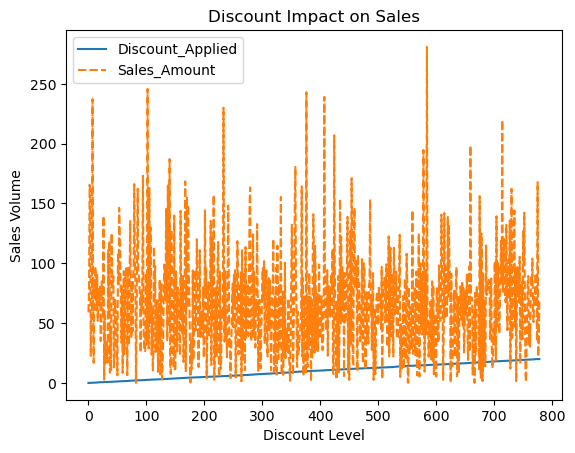

In [25]:
# Plot discount vs. sales volume

sns.lineplot(discount_groups)
plt.xlabel('Discount Level')
plt.ylabel('Sales Volume')
plt.title('Discount Impact on Sales')

In [26]:
# Analyze correlation

correlation = discount_groups['Discount_Applied'].corr(discount_groups['Sales_Amount'])
print(f"Correlation: {correlation}")


Correlation: -0.009765862039890568


In [27]:
# Identify optimal discount level

optimal_discount = discount_groups.loc[discount_groups['Sales_Amount'].idxmax()]['Discount_Applied']
print(f"Optimal Discount Level: {optimal_discount}")

Optimal Discount Level: 14.92


## Documentation: Document the operations performed and the insights gained.

1. Creates a 2D numpy array from a pandas DataFrame, where Sales_Amount is the value, Region is the index, and Product_Category is the column. It then calculates summary statistics and identifies the top-performing regions for each product category, displaying the results in a DataFrame.
2. Extracts sales data for the Electronics product category in the North and South regions, calculates the percentage change in sales between the two regions, and prints the results for comparative analysis.
3. Calculates the stock turnover rate for each product category, prints the stock turnover rates, and identifies high and low turnover products based on the average stock turnover rate.
4. Extracts the year and month from the 'Date_of_Purchase' column, creates a regional sales trend table, plots the regional sales trends, and identifies the peak and low seasons for each region..
5. Groups sales data by discount levels, plots the relationship between discount levels and sales volume, analyzes the correlation between the two, and identifies the optimal discount level that maximizes sales.

# Sprint 3: Advanced Data Analysis 

Objective: After manipulating the data, the next step is to dive deeper into the data using Pandas for more detailed analysis. The management team seeks to understand customer behavior, product performance, and sales patterns to make data-driven decisions.

## Scenario 1: Customer Segmentation Analysis
1. Segment Customers Using Pandas: Segment customers based on their purchasing behavior and demographics.

In [28]:
# To analyze purchasing behavior, you can explore the following insights:

behavior = pd.pivot_table(df, values = 'Sales_Amount', index = ['Year','Region'], columns = ['Customer_Segment','Product_Category'], aggfunc = 'mean')

purchasing_behavior = behavior.fillna(0)
purchasing_behavior

Customer_Segment      New                                               \
Product_Category    Books   Clothing Electronics  Furniture  Groceries   
Year Region                                                              
2020 East         46.7900  70.150000   60.881667  69.820000  43.120000   
     North        49.3900  35.492000   39.050000  42.976000  55.680000   
     South        44.8120  56.564545   57.860000  42.362500  67.540000   
     West         59.1240  24.415000   42.455000  42.007143  43.115000   
2021 East         61.5800  54.851429   31.125714  27.166667   0.000000   
     North        72.0880  75.166000   54.588333  55.280000  67.592000   
     South        42.3250  45.706667   52.410000  37.718000  49.837500   
     West         51.7960  51.276250   74.265000  61.170000  57.717500   
2022 East         69.9900  70.940000   30.356667  35.520000   0.000000   
     North        47.3375  53.258571   89.360000  56.430000  31.554000   
     South        61.1180  54.074286   52.768000  64.656667  53.400000   
     West         50.1025  40.785000   52.486250  35.036667  79.206667   

Customer_Segment    Regular                                               \
Product_Category      Books   Clothing Electronics  Furniture  Groceries   
Year Region                                                                
2020 East         49.294286  56.024000   39.592857  28.352500  57.600000   
     North        13.413333  34.475000   42.848571  46.081667  45.502308   
     South        50.126667  48.200000   38.780000  72.599000   0.000000   
     West         55.412000  20.986667   56.685000  49.434000  54.241667   
2021 East         38.885000  31.404000   60.865000  59.136667  56.300000   
     North        48.825714  70.254000   33.911000  60.580000  45.708000   
     South        60.766667  51.501429   83.850000  43.354545  69.355714   
     West         43.014000  52.301250   68.707500  67.898000  62.047778   
2022 East         48.134000  44.898000   52.110000  43.405000  44.436667   
     North        44.568333  32.094286   40.698000  92.750000  12.430000   
     South        79.783333  53.857143   40.681667  50.802000  82.310000   
     West         70.213333  17.165000   39.310000  24.073333  41.935000   

Customer_Segment        VIP                                               
Product_Category      Books   Clothing Electronics  Furniture  Groceries  
Year Region                                                               
2020 East         53.933333  60.151250   43.315000  49.631250  35.070000  
     North        86.315000  42.162500   40.560000   0.000000  63.932500  
     South        73.210000  49.899000   30.858889  45.841429  51.147143  
     West         41.460000  55.965714   54.895556  47.606667  50.085714  
2021 East         52.927143  47.637143   46.950000  40.043750  54.367500  
     North        49.312500  51.585000   65.342857  62.744444  32.208333  
     South        51.022000  48.462000   51.625714  41.552857  68.600000  
     West         58.296250  51.936000   56.626000  60.003333  53.597500  
2022 East          0.000000  58.651429   45.658000  37.676667  58.038333  
     North        61.173333  47.684000   65.348571  64.625000  58.705556  
     South        39.772000  50.407143   77.610000  48.888000  39.095000  
     West         28.353333  44.026000   64.491667  70.910000  51.803333

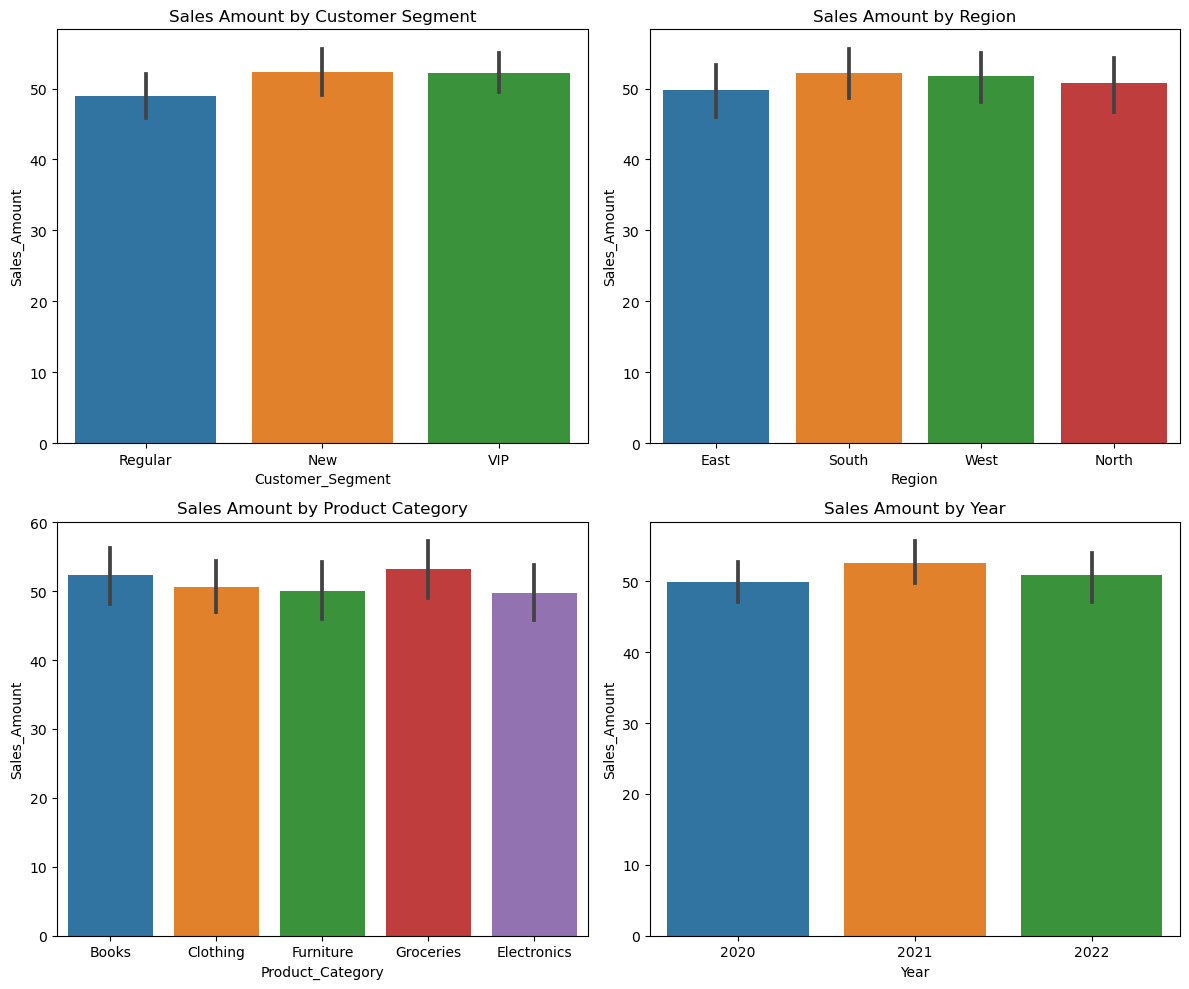

In [30]:
# Plot purchasing behavior in graph:

# Create a figure with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(12,10))

# Sales Amount by Customer Segment
sns.barplot(x='Customer_Segment', y='Sales_Amount', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Sales Amount by Customer Segment')

# Sales Amount by Region
sns.barplot(x='Region', y='Sales_Amount', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Sales Amount by Region')

# Sales Amount by Product Category
sns.barplot(x='Product_Category', y='Sales_Amount', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Sales Amount by Product Category')

# Sales Amount by Order Source
sns.barplot(x='Year', y='Sales_Amount', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Sales Amount by Year')

plt.tight_layout()
plt.show()

In [95]:
#  To analyze demographics, you can explore the following insights:

x = pd.pivot_table(df, values = 'Sales_Amount', index = ['Customer_Segment','Product_Category'], columns = ['Customer_Age','Customer_Gender'], aggfunc = 'mean')

demographics = x.fillna(0)
demographics

Customer_Age                              18              19             20  \
Customer_Gender                       Female    Male  Female   Male  Female   
Customer_Segment Product_Category                                             
New              Books              0.000000   0.000  39.155  95.78   0.000   
                 Clothing           0.000000  13.335   0.000   0.00  73.390   
                 Electronics        0.000000  83.330   4.010   0.00   0.000   
                 Furniture         34.683333  78.910   0.000   0.00   0.000   
                 Groceries         55.620000   0.000   0.000  64.21  65.450   
Regular          Books             68.590000  82.110  38.650   0.00   0.000   
                 Clothing           0.000000   0.000   0.000   0.00  36.490   
                 Electronics        0.000000   0.000   6.740   0.00   0.000   
                 Furniture          0.000000   0.000   0.000   0.00   0.000   
                 Groceries         44.410000   0.000   0.000   0.00   0.000   
VIP              Books              0.000000   0.000   0.000   0.82  54.345   
                 Clothing          33.850000  57.830   0.000   0.00  42.350   
                 Electronics       76.410000  48.735  71.690  21.77   0.000   
                 Furniture          0.000000   0.000  44.565   0.00   0.000   
                 Groceries          0.000000  55.840  62.895  23.30  31.630   

Customer_Age                                     21                 22  \
Customer_Gender                     Male     Female    Male     Female   
Customer_Segment Product_Category                                        
New              Books             75.65   0.000000  58.260   0.000000   
                 Clothing           0.00   0.000000  99.290   0.000000   
                 Electronics        0.00   0.000000  42.990  93.860000   
                 Furniture          4.23   0.000000   0.000   0.000000   
                 Groceries          0.00  87.780000   0.000  85.010000   
Regular          Books             35.23   0.000000   0.000  72.540000   
                 Clothing           7.54  45.576667  87.880  24.343333   
                 Electronics        0.00   0.000000  85.080   0.000000   
                 Furniture         33.49   0.000000   0.000   0.000000   
                 Groceries         64.86  68.230000   0.000  49.685000   
VIP              Books              0.00   0.000000  64.755   3.110000   
                 Clothing           0.00   0.000000   0.000   0.000000   
                 Electronics        7.23  99.430000   0.000   0.000000   
                 Furniture         41.32   0.000000   0.000   0.000000   
                 Groceries         55.90  78.290000  54.400  63.740000   

Customer_Age                               ...      65               66  \
Customer_Gender                      Male  ...  Female    Male   Female   
Customer_Segment Product_Category          ...                            
New              Books             35.430  ...   0.000   0.000  27.8600   
                 Clothing           0.000  ...   0.000  26.860  48.6150   
                 Electronics       44.380  ...   0.000   0.000  94.9100   
                 Furniture          0.000  ...  35.480  31.525  62.1600   
                 Groceries          0.000  ...  62.600   0.000   0.0000   
Regular          Books             82.510  ...   0.000  76.080   0.0000   
                 Clothing           0.000  ...   0.000   0.000   0.0000   
                 Electronics        0.000  ...  26.055  47.390  48.2325   
                 Furniture          0.000  ...   0.000   0.000  71.6600   
                 Groceries         10.835  ...  66.590  62.490   0.0000   
VIP              Books              0.000  ...  75.200  45.395   0.0000   
                 Clothing          19.400  ...  53.695  50.125   0.0000   
                 Electronics        0.000  ...  52.660  52.740   0.0000   
                 Furniture          0.000  .

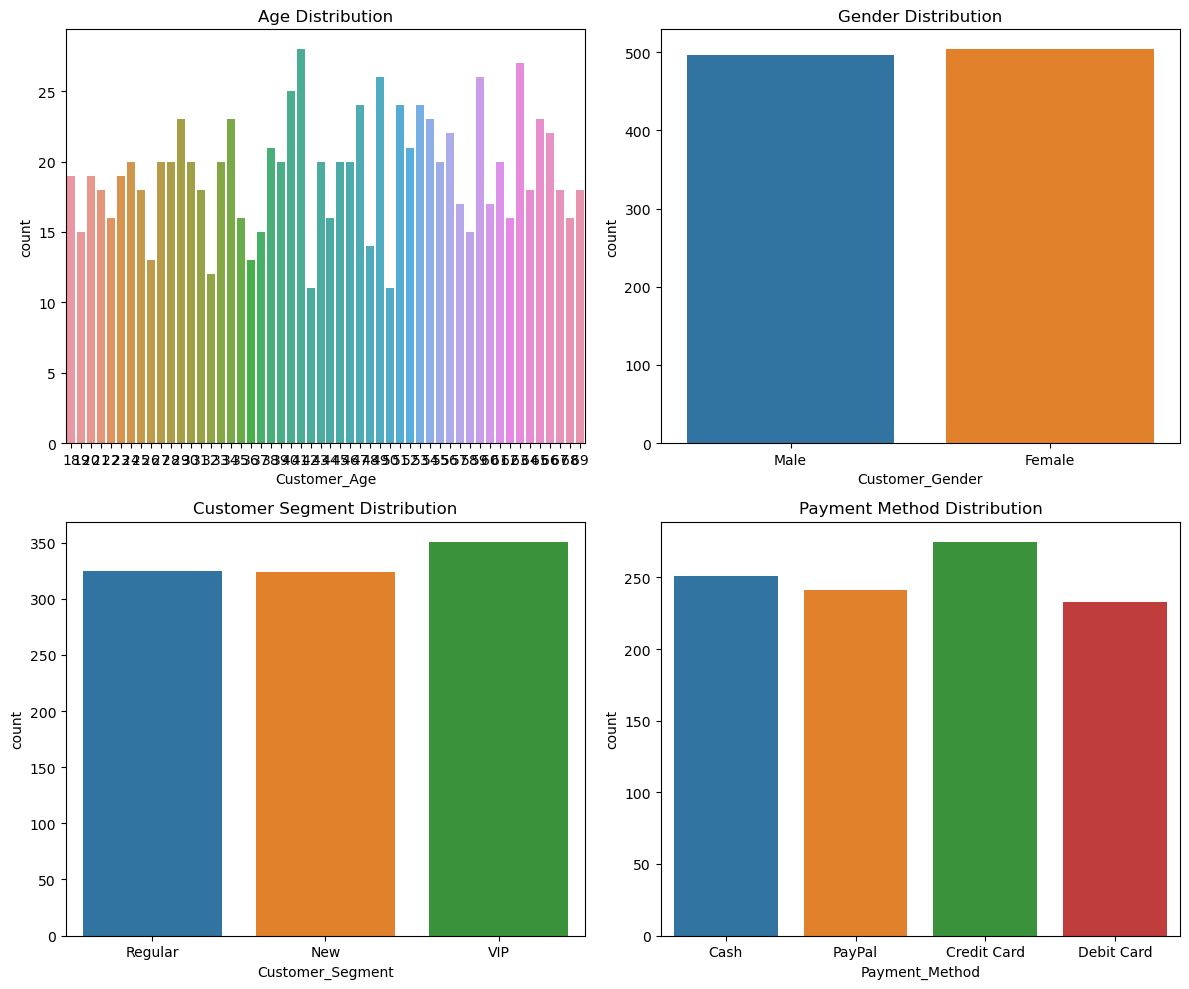

In [72]:
# Plot demographics in graph:

# Create a figure with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(12,10))

# Age Distribution
sns.countplot(x='Customer_Age', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Age Distribution')

# Gender Distribution
sns.countplot(x='Customer_Gender', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Gender Distribution')

# Customer Segment Distribution
sns.countplot(x='Customer_Segment', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Customer Segment Distribution')

# Payment Method Distribution
sns.countplot(x='Payment_Method', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Payment Method Distribution')


plt.tight_layout()
plt.show()


2. Correlation Analysis Using Pandas: Analyze the correlation between customer satisfaction scores and total spending.

In [96]:
# Calculate the correlation coefficient

correlation_coefficient = df['Customer_Satisfaction'].corr(df['Total_Revenue'])

print(f'Correlation Coefficient: {correlation_coefficient:.2f}')
print('\nThere is no any linear realation between customer_Satisfaction and Total_Revenue')

Correlation Coefficient: 0.01

There is no any linear realation between customer_Satisfaction and Total_Revenue


## Scenario 2: Product Bundling Strategy
3. Identify Product Bundles: Identify products frequently purchased together and recommend potential bundles.

In [58]:
# Calculate the products frequently purchased together and recommend potential bundles. 

potential_bundles = df.groupby(['Month','Region']).agg({ 'Customer_Age': set,'Product_Category': set, 'Customer_Satisfaction': set}).reset_index()
potential_bundles

,Month,Region,Customer_Age,Product_Category,Customer_Satisfaction
0,1,East,"{21, 23, 28, 29, 30, 31, 32, 33, 39, 40, 46, 5...","{Clothing, Electronics, Furniture, Books, Groc...","{0.2, 1.0, 1.2, 2.6, 4.9, 4.4, 0.7, 0.6, 4.8, ..."
1,1,North,"{32, 67, 41, 43, 44, 45, 47, 48, 24, 28, 29, 63}","{Clothing, Groceries, Furniture, Books}","{0.6, 1.4, 2.4, 2.0, 2.5, 0.5, 4.6, 2.1, 3.1, ..."
2,1,South,"{25, 28, 30, 33, 37, 41, 43, 45, 46, 47, 49, 5...","{Clothing, Electronics, Furniture, Books, Groc...","{0.8, 1.1, 2.2, 2.4, 4.4, 4.9, 1.3, 0.0, 2.9, ..."
3,1,West,"{18, 20, 21, 22, 24, 25, 26, 30, 40, 41, 42, 4...","{Clothing, Electronics, Furniture, Books, Groc...","{0.2, 1.1, 2.2, 3.2, 3.1, 4.0, 4.3, 2.3, 2.7, ..."
4,2,East,"{32, 33, 35, 36, 69, 41, 45, 49, 50, 22, 56, 2...","{Electronics, Clothing, Furniture, Books, Groc...","{0.2, 1.7, 2.7, 3.9, 3.5, 1.8, 4.1, 4.0, 3.6, ..."
5,2,North,"{64, 65, 34, 68, 40, 41, 43, 46, 47, 49, 51, 2...","{Clothing, Electronics, Furniture, Books, Groc...","{0.3, 1.6, 2.7, 3.3, 3.5, 4.1, 2.1, 3.8, 1.7, ..."
6,2,South,"{34, 36, 38, 41, 44, 45, 46, 47, 19, 52, 53, 5...","{Clothing, Electronics, Furniture, Books, Groc...","{0.9, 0.3, 2.1, 3.2, 4.5, 4.7, 3.9, 4.1, 0.5, ..."
7,2,West,"{22, 27, 28, 32, 33, 34, 38, 41, 45, 49, 53, 5...","{Electronics, Clothing, Furniture, Books, Groc...","{0.8, 1.0, 2.0, 2.5, 3.3, 4.0, 3.4, 1.2, 3.5, ..."
8,3,East,"{65, 35, 40, 41, 27, 43, 49, 50, 19, 52, 21, 5...","{Clothing, Electronics, Furniture, Books, Groc...","{0.5, 1.7, 2.8, 3.3, 1.6, 2.9, 0.7, 3.9, 1.0, ..."
9,3,North,"{64, 33, 67, 37, 41, 42, 43, 46, 49, 18, 19, 5...","{Clothing, Electronics, Furniture, Books, Groc...","{0.2, 0.5, 2.0, 2.2, 3.6, 4.5, 2.8, 4.2, 4.7, ..."


4. Optimize Bundling Strategy: Simulate different bundling scenarios using Pandas and recommend the most profitable strategy.

In [64]:
# Calculate the the most profitable strategy. 

profitable_strategy = df.groupby(['Month','Region']).agg({'Customer_Age': set,'Product_Category': set, 'Customer_Satisfaction': set, 'Profit': sum}).reset_index()
profitable_strategy

,Month,Region,Customer_Age,Product_Category,Customer_Satisfaction,Profit
0,1,East,"{21, 23, 28, 29, 30, 31, 32, 33, 39, 40, 46, 5...","{Clothing, Electronics, Furniture, Books, Groc...","{0.2, 1.0, 1.2, 2.6, 4.9, 4.4, 0.7, 0.6, 4.8, ...",-318.45
1,1,North,"{32, 67, 41, 43, 44, 45, 47, 48, 24, 28, 29, 63}","{Clothing, Groceries, Furniture, Books}","{0.6, 1.4, 2.4, 2.0, 2.5, 0.5, 4.6, 2.1, 3.1, ...",38.76
2,1,South,"{25, 28, 30, 33, 37, 41, 43, 45, 46, 47, 49, 5...","{Clothing, Electronics, Furniture, Books, Groc...","{0.8, 1.1, 2.2, 2.4, 4.4, 4.9, 1.3, 0.0, 2.9, ...",-251.15
3,1,West,"{18, 20, 21, 22, 24, 25, 26, 30, 40, 41, 42, 4...","{Clothing, Electronics, Furniture, Books, Groc...","{0.2, 1.1, 2.2, 3.2, 3.1, 4.0, 4.3, 2.3, 2.7, ...",-382.22
4,2,East,"{32, 33, 35, 36, 69, 41, 45, 49, 50, 22, 56, 2...","{Electronics, Clothing, Furniture, Books, Groc...","{0.2, 1.7, 2.7, 3.9, 3.5, 1.8, 4.1, 4.0, 3.6, ...",-243.99
5,2,North,"{64, 65, 34, 68, 40, 41, 43, 46, 47, 49, 51, 2...","{Clothing, Electronics, Furniture, Books, Groc...","{0.3, 1.6, 2.7, 3.3, 3.5, 4.1, 2.1, 3.8, 1.7, ...",-401.92
6,2,South,"{34, 36, 38, 41, 44, 45, 46, 47, 19, 52, 53, 5...","{Clothing, Electronics, Furniture, Books, Groc...","{0.9, 0.3, 2.1, 3.2, 4.5, 4.7, 3.9, 4.1, 0.5, ...",-260.05
7,2,West,"{22, 27, 28, 32, 33, 34, 38, 41, 45, 49, 53, 5...","{Electronics, Clothing, Furniture, Books, Groc...","{0.8, 1.0, 2.0, 2.5, 3.3, 4.0, 3.4, 1.2, 3.5, ...",-683.41
8,3,East,"{65, 35, 40, 41, 27, 43, 49, 50, 19, 52, 21, 5...","{Clothing, Electronics, Furniture, Books, Groc...","{0.5, 1.7, 2.8, 3.3, 1.6, 2.9, 0.7, 3.9, 1.0, ...",-497.04
9,3,North,"{64, 33, 67, 37, 41, 42, 43, 46, 49, 18, 19, 5...","{Clothing, Electronics, Furniture, Books, Groc...","{0.2, 0.5, 2.0, 2.2, 3.6, 4.5, 2.8, 4.2, 4.7, ...",-658.41


In [61]:
# Recommend the most profitable strategy

most_profitable_month = pro.loc[profitable_strategy['Profit'].idxmax()]['Month']
most_profitable_region = pro.loc[profitable_strategy['Profit'].idxmax()]['Region']

print(f"Most profitable strategy: Month = {most_profitable_month}, Region = {most_profitable_region}")

Most profitable strategy: Month = 1, Region = North


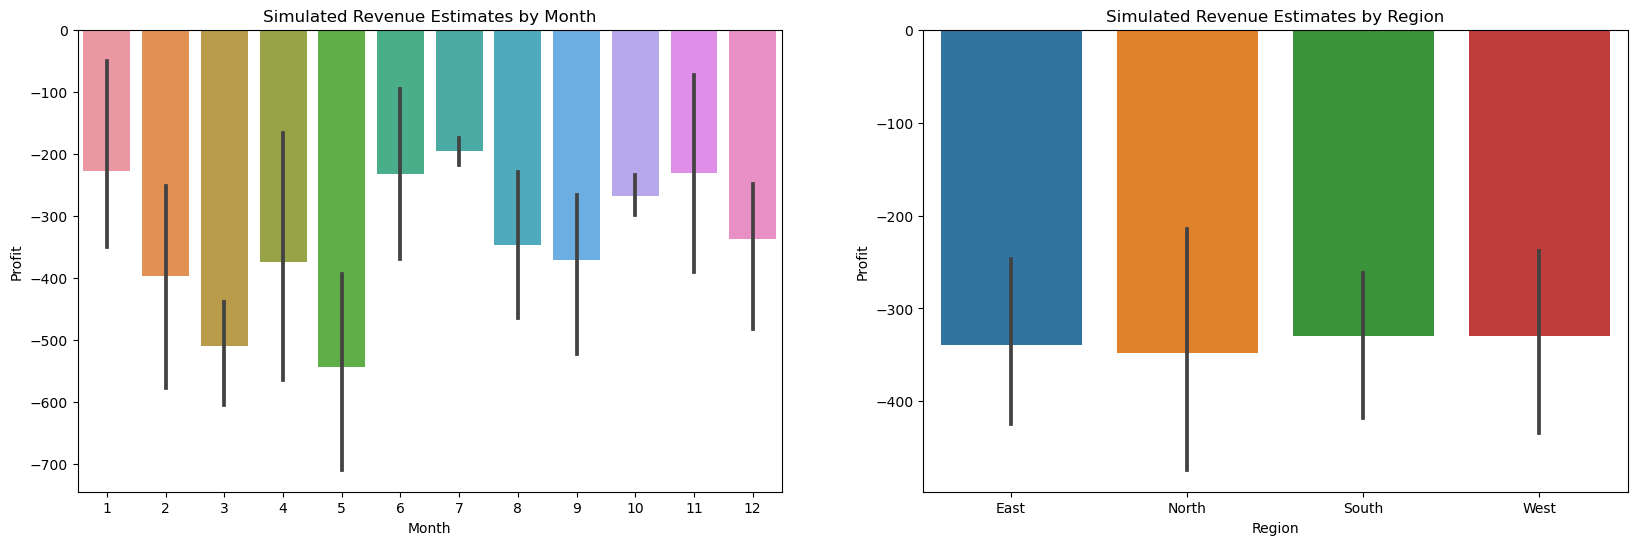

In [78]:
# Plot demographics in graph:

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Bar plot for revenue estimates by month
sns.barplot(x='Month', y='Profit', data=profitable_strategy, ax=axs[0])
axs[0].set_title('Simulated Revenue Estimates by Month')

# Bar plot for revenue estimates by region
sns.barplot(x='Region', y='Profit', data=profitable_strategy, ax=axs[1])
axs[1].set_title('Simulated Revenue Estimates by Region')

# Show the figure
plt.show()

## Scenario 3: Sales Channel Analysis
5. Analyze Sales by Order Source: Analyze sales performance across different order sources (Online, In-Store, Mobile App).


In [80]:
# Group data by Order_Source and calculate total Sales_Amount and Profit

order_source_sales = df.groupby('Order_Source')[['Sales_Amount', 'Quantity_Sold', 'Profit']].sum()
order_source_sales

,Sales_Amount,Quantity_Sold,Profit
Order_Source,,,
In-Store,16118.54,16319.433118,-6293.24
Mobile App,18050.41,17385.062000,-4797.27
Online,16983.84,16534.929097,-5070.36


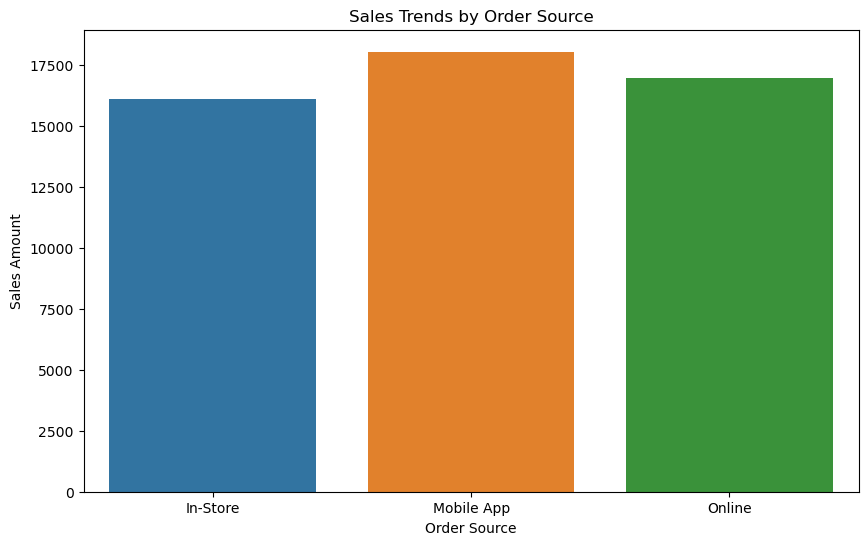

In [86]:
# Plot bar chart to visualize sales trends by order source

plt.figure(figsize=(10, 6))
sns.barplot(x=order_source_sales.index, y=order_source_sales['Sales_Amount'])
plt.title('Sales Trends by Order Source')
plt.xlabel('Order Source')
plt.ylabel('Sales Amount')
plt.show()

In [84]:
# Calculate average order value and profit margin
order_source_sales['Average_Order_Value'] = order_source_sales['Sales_Amount'] / order_source_sales['Quantity_Sold']
order_source_sales['Profit_Margin'] = order_source_sales['Profit'] / order_source_sales['Sales_Amount']

# Print the results
print(order_source_sales)

# Identify the most profitable channel
most_profitable_channel = order_source_sales.loc[order_source_sales['Profit_Margin'].idxmax()]
print(f"The most profitable channel is {most_profitable_channel.name} with a profit margin of {most_profitable_channel.Profit_Margin:.2f}%")

              Sales_Amount  Quantity_Sold   Profit  Average_Order_Value  \
Order_Source                                                              
In-Store          16118.54   16319.433118 -6293.24             0.987690   
Mobile App        18050.41   17385.062000 -4797.27             1.038271   
Online            16983.84   16534.929097 -5070.36             1.027149   

              Profit_Margin  
Order_Source                 
In-Store          -0.390435  
Mobile App        -0.265771  
Online            -0.298540  
The most profitable channel is Mobile App with a profit margin of -0.27%


6. Evaluate Payment Method Preferences: Analyze customer payment method preferences and their impact on sales.

In [88]:
# Group data by Payment_Method and calculate total Sales_Amount

payment_method_sales = df.groupby('Payment_Method')['Sales_Amount'].sum().reset_index()
payment_method_sales

,Payment_Method,Sales_Amount
0,Cash,13139.02
1,Credit Card,14180.15
2,Debit Card,11666.32
3,PayPal,12167.30


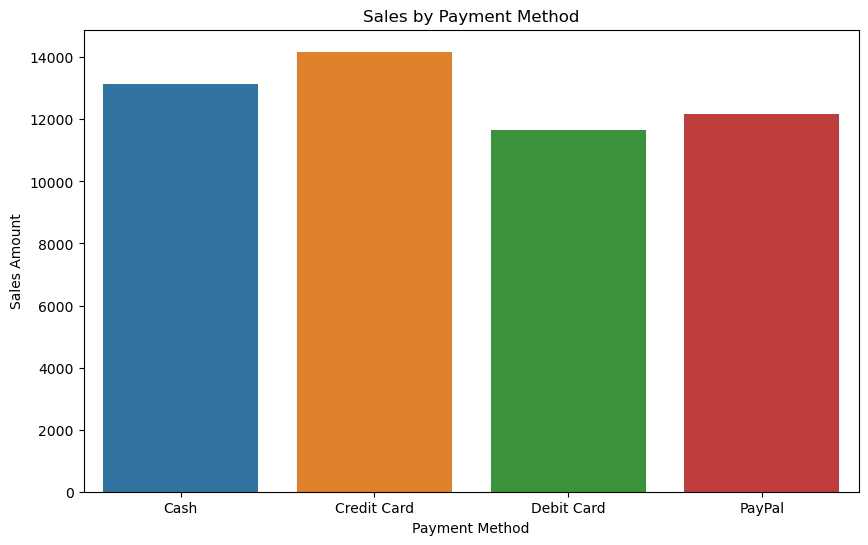

In [89]:
# Plot bar chart to visualize sales by payment method

plt.figure(figsize=(10, 6))
sns.barplot(x=payment_method_sales['Payment_Method'], y=payment_method_sales['Sales_Amount'])
plt.title('Sales by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Sales Amount')
plt.show()

In [94]:
# Calculate percentage of sales for each payment method
payment_method_sales['Sales_Percentage'] = (payment_method_sales['Sales_Amount'] / payment_method_sales['Sales_Amount'].sum()) * 100

# Identify most popular payment methods and their impact on sales
most_popular_payment_methods = payment_method_sales.sort_values('Sales_Percentage', ascending=False).head(3)
print(most_popular_payment_methods)

# Recommendations for payment options to promote
print("\nRecommendations:")
print("1. Promote the most popular payment methods (e.g., offer discounts or rewards)")
print("2. Consider offering additional payment options to attract more customers")
print("3. Analyze customer demographics and preferences to tailor payment options")

  Payment_Method  Sales_Amount  Sales_Percentage
1    Credit Card      14180.15         27.721166
0           Cash      13139.02         25.685833
3         PayPal      12167.30         23.786190

Recommendations:
1. Promote the most popular payment methods (e.g., offer discounts or rewards)
2. Consider offering additional payment options to attract more customers
3. Analyze customer demographics and preferences to tailor payment options


## Documentation: Document the analysis process, key insights, and visualizations.


1. Analyzes customer purchasing behavior and demographics by creating pivot tables and visualizing the data using seaborn bar plots and count plots. The insights include sales amount by customer segment, region, product category, and year, as well as age and gender distributions, customer segment distribution, and payment method distribution.
2. Calculates the correlation coefficient between customer satisfaction scores and total spending using Pandas, revealing a weak correlation (0.01) indicating no significant linear relationship between the two variables.
3. Potential product bundles by grouping customer purchases by month and region, and aggregating customer age, product category, and customer satisfaction into sets, revealing frequently co-purchased items.
4. The most profitable strategy by month and region, and recommends the combination with the highest profit. It also visualizes the revenue estimates by month and region using bar plots, providing a clear representation of the most profitable strategies.
5. Analyzes sales trends by order source, calculating total sales amount, profit, average order value, and profit margin, and identifies the most profitable channel. It also visualizes the sales trends using a bar chart, providing a clear representation of the data.
6. Analyzes sales by payment method, calculating total sales amount and percentage of sales for each method, and identifies the most popular payment methods. It also provides recommendations for payment options to promote, aiming to increase sales and attract more customers.